In [43]:
# Phase 1: Data Collection 
import pandas as pd

# Set display options
pd.set_option("expand_frame_repr", False)

# Load the dataset (make sure the filename is correct and enclosed in quotes)
df = pd.read_csv('Clean 2 - UGRansome.csv')
df.columns = ['Time','Protocol','Flag','Family','Clusters','SeedAddress','ExpAddress','BTC','USD','Netflow_Bytes','IPaddress','Threats','Port','Prediction']
# Display the DataFrame
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,12,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


In [47]:
# Phase 2: Data Preparation (feature engineering and data transformation)

# --- Drop all duplicate rows --- #

df = df.drop_duplicates()

# --- Remove negative values from time feature --- #

df['Time'] = df['Time'] + 11

# adding 11 to each value in the 'Time' column of the DataFrame 'df2'. 
#In other words, it's performing an element-wise addition operation on all the values in the 'Time' column, 
#increasing each value by 11 units. This is often done in data manipulation to shift or adjust time or numerical values 
#by a fixed amount

In [49]:
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,62,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,42,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,79,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,63,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206821,55,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
206822,55,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
206823,55,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
206824,55,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


In [51]:
# --- Math transformations to reduce skewness --- #

# --- Log transformation applied to column NETFLOW_BYTES --- #
# A log transformation involves taking the natural logarithm (base e) of each data point in a particular column or feature.
#Logarithmic transformations are often used to reduce the impact of extreme values (outliers) and make the data conform more 
#closely to a normal distribution. They are particularly useful when dealing with positively skewed data, 
#where the tail of the distribution is elongated on the right side.


#The np.log() function is a common way to perform a logarithmic transformation in Python. 
#The + 1 added to the data points is often used to avoid issues with taking the logarithm of zero or negative values. 
#It's a common practice to add a small constant like 1 to the data before applying the logarithm.

#By applying a log transformation to a feature, you're essentially compressing the range of values in that feature, 
#which can help in cases where the data exhibits a rightward skew, making it more suitable for certain types of analysis 
#or modeling techniques that assume normally distributed data.

df['Netflow_Bytes'] = np.log(df['Netflow_Bytes']+1)


In [53]:
# --- Square root transformation applied to columns USD ---#

#Square Root Transformation: A square root transformation involves taking the square root of each data point in the 
#specified column. In this case, it's applied to the 'USD' column.

#Square root transformations are a type of mathematical transformation used to mitigate the impact of right-skewed data. 
#Just like logarithmic transformations, square root transformations can help make the data more symmetric and closer to 
#a normal distribution.

#The np.sqrt() function is used to calculate the square root.
#By applying a square root transformation to the 'USD' column, the code is attempting to make the data distribution less skewed 
#and more suitable for certain statistical analyses or modeling techniques that assume normally distributed data or 
#require data to be more symmetric. It's a common technique used in data preprocessing to improve the quality of data for 
#analysis or modeling

df['USD'] = np.sqrt(df['USD'])

In [55]:
# --- Yeo Johnson transformation applied to columns BTC--#


#Yeo-Johnson transformation is being applied to the 'BTC' column in the DataFrame (df2['BTC']). 
#This transformation is used to modify the data in the 'BTC' column to make its distribution more normalized or symmetric
#The Yeo-Johnson transformation is a mathematical transformation technique used to modify the distribution of data. 
#It can be applied to both positive and negative values and is more versatile than some other transformations like the Box-Cox transformation.

#The transformation is performed using the stats.yeojohnson() function from a library like SciPy
df['BTC'], _ = stats.yeojohnson(df['BTC'])

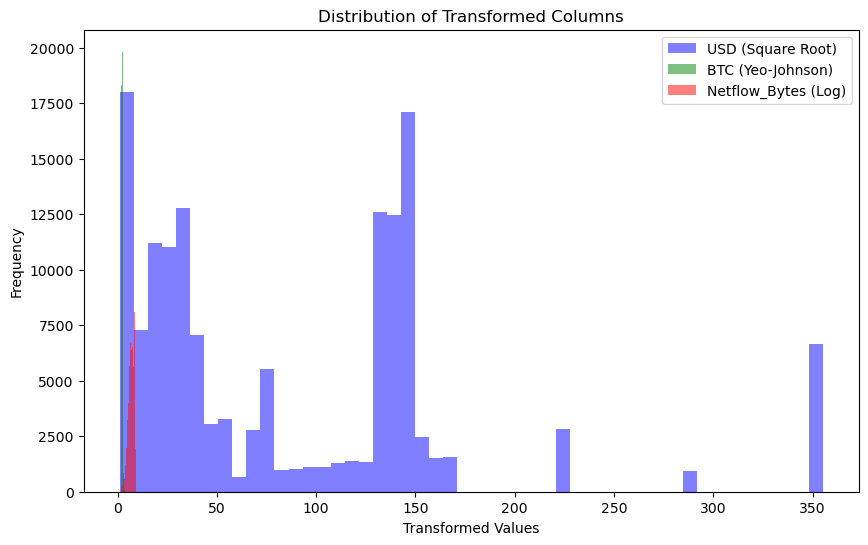

In [57]:
#--PLOTING TRANSFORMED DATA--#

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the transformed 'USD' column
ax.hist(df['USD'], bins=50, alpha=0.5, color='blue', label='USD (Square Root)')

# Plot the transformed 'BTC' column
ax.hist(df['BTC'], bins=50, alpha=0.5, color='green', label='BTC (Yeo-Johnson)')

# Plot the transformed 'Netflow_Bytes' column
ax.hist(df['Netflow_Bytes'], bins=50, alpha=0.5, color='red', label='Netflow_Bytes (Log)')

# Add labels and a legend
ax.set_xlabel('Transformed Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns')
ax.legend()

# Show the plot
plt.show()

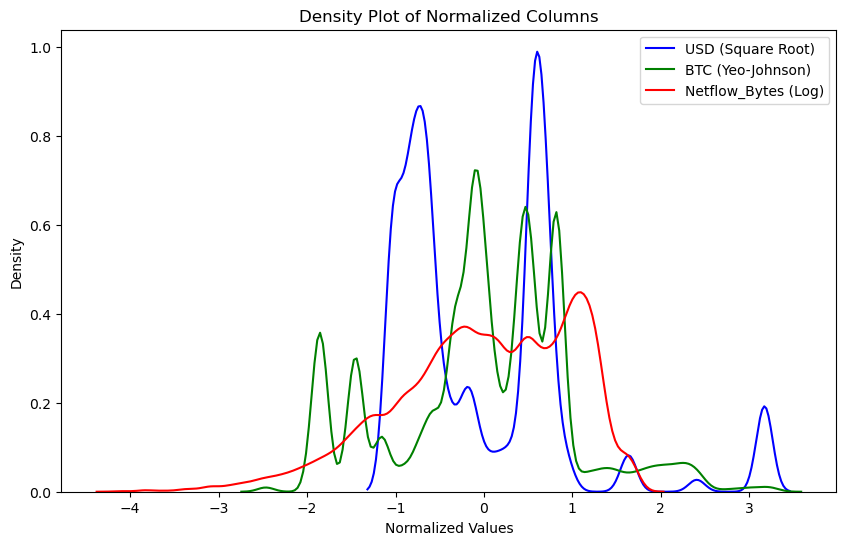

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a StandardScaler instance
# The StandardScaler is a common preprocessing technique used in machine learning and data analysis. 
#It is used to standardize or normalize the features of a dataset by scaling them such that they have a mean of 0 and a standard
#deviation of 1.


#Standardizing the features is useful because it makes different features more directly comparable, especially in algorithms 
#that are sensitive to the scale of the input data, such as many machine learning algorithms.
#In the code provided, scaler is created as an instance of the StandardScaler class, which can then be used to standardize 
#the specified columns in the df2 DataFrame using the fit_transform method, as seen in the subsequent code

scaler = StandardScaler()

# Normalize each column's features
df_normalized = df.copy()
df_normalized[['USD', 'BTC', 'Netflow_Bytes']] = scaler.fit_transform(df[['USD', 'BTC', 'Netflow_Bytes']])

# Plot the density of the normalized 'USD' column
sns.kdeplot(df_normalized['USD'], color='blue', label='USD (Square Root)', ax=ax)

# Plot the density of the normalized 'BTC' column
sns.kdeplot(df_normalized['BTC'], color='green', label='BTC (Yeo-Johnson)', ax=ax)

# Plot the density of the normalized 'Netflow_Bytes' column
sns.kdeplot(df_normalized['Netflow_Bytes'], color='red', label='Netflow_Bytes (Log)', ax=ax)

# Add labels and a legend
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()

# Show the plot
plt.show()



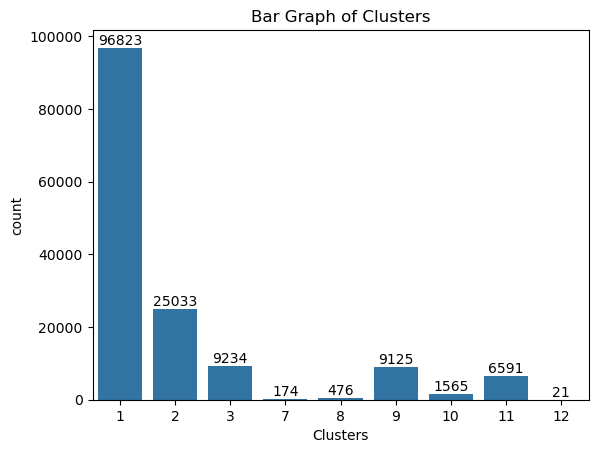

In [61]:
# Phase 3: Data Visualization

# --- Count visualizations --- #

# Categorical count visualizations

# Protocol clusters

ax = sns.countplot(x=df['Clusters'], data=df)
plt.title('Bar Graph of Clusters')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


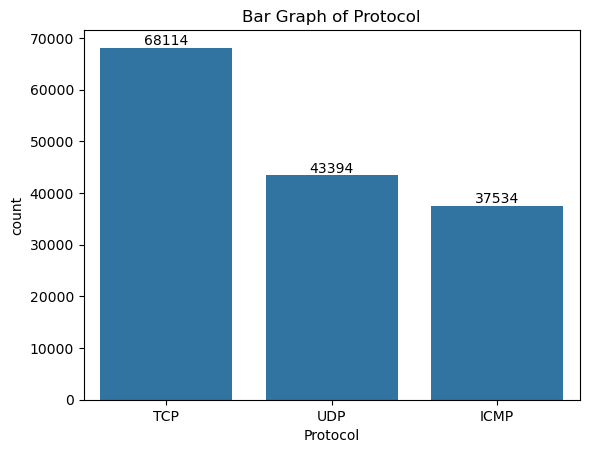

In [65]:
# Phase 3: Data Visualization

# --- Count visualizations --- #

# Categorical count visualizations

# Protocol count

ax = sns.countplot(x=df['Protocol'], data=df)
plt.title('Bar Graph of Protocol')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


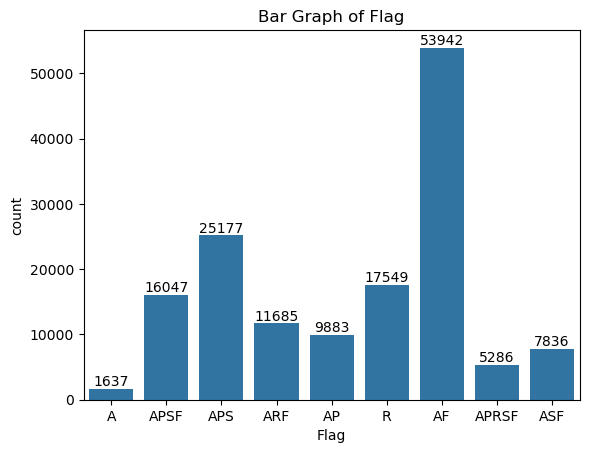

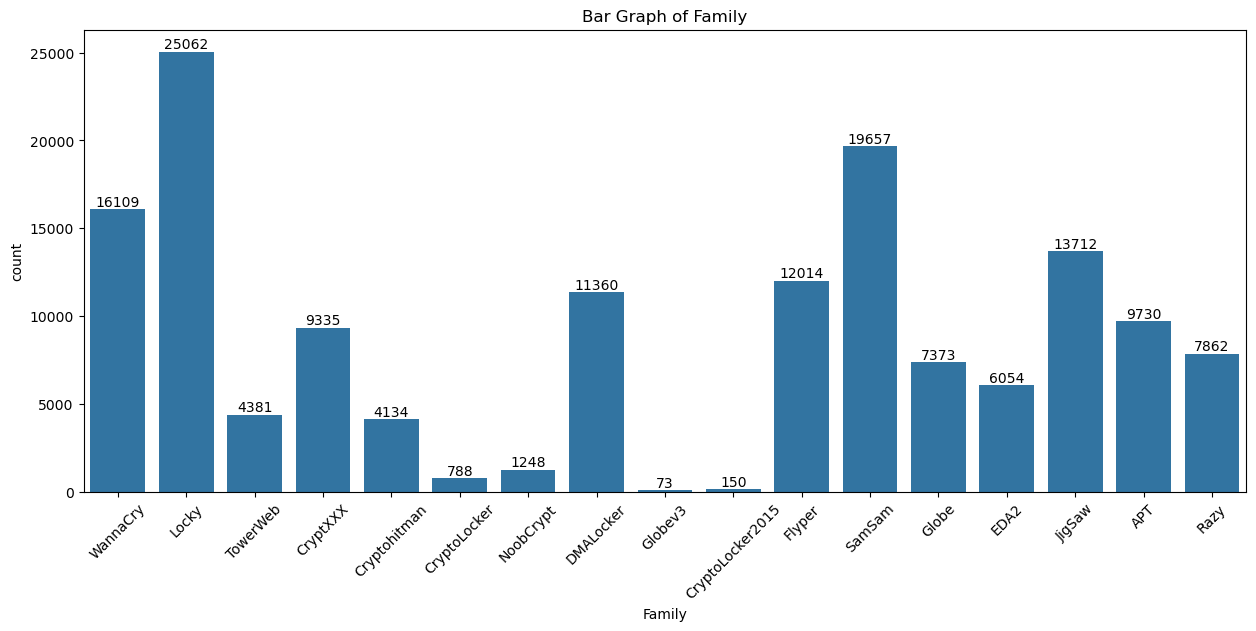

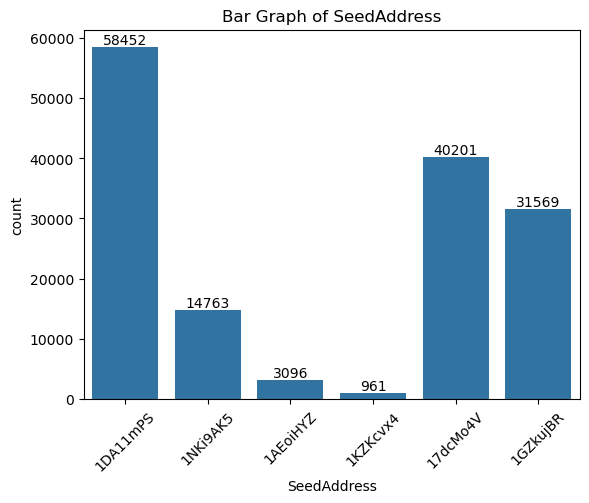

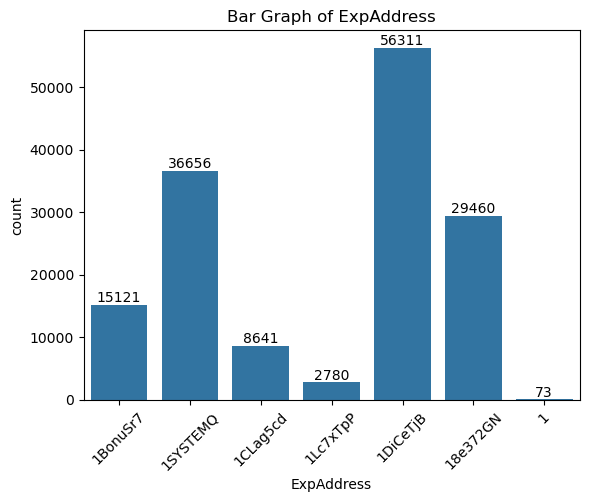

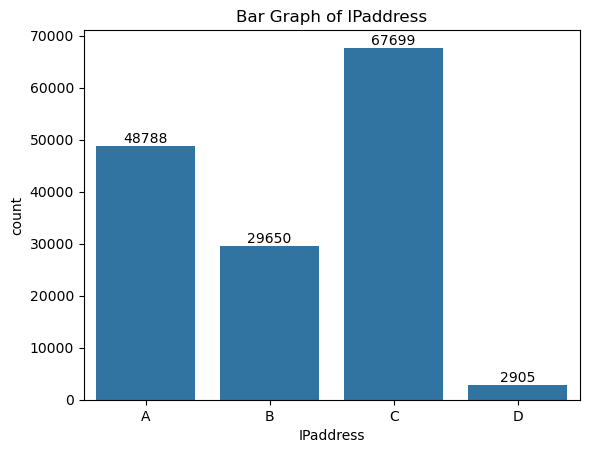

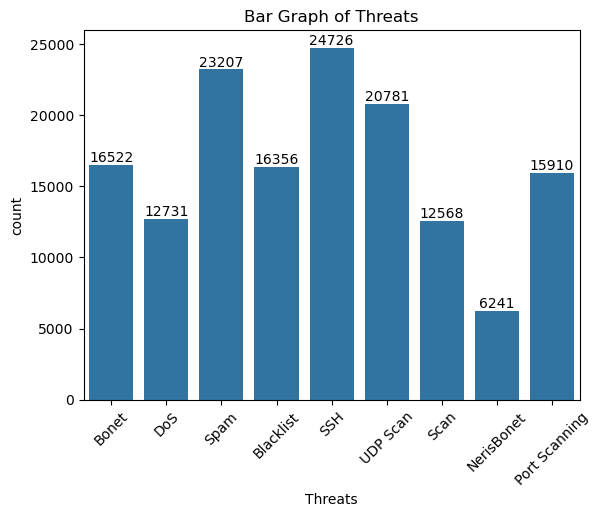

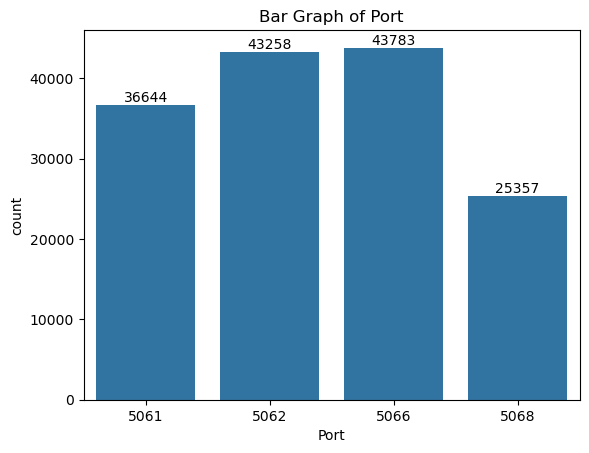

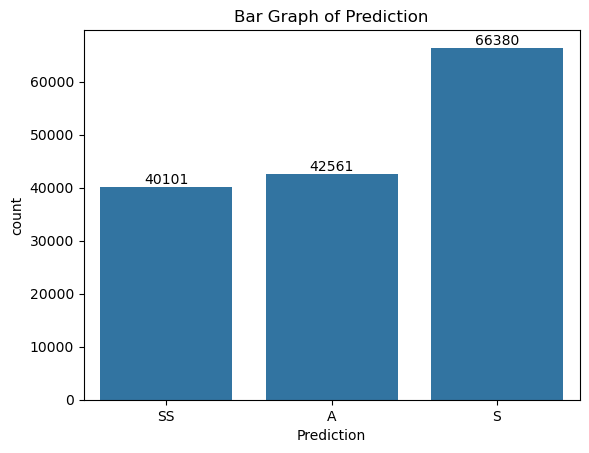

In [67]:
# Flag count

ax = sns.countplot(x=df['Flag'], data=df)
plt.title('Bar Graph of Flag')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Family count

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df['Family'], data=df)
plt.title('Bar Graph of Family')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# SeedAddress count

ax = sns.countplot(x=df['SeedAddress'], data=df)
plt.title('Bar Graph of SeedAddress')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# ExpAddress count

ax = sns.countplot(x=df['ExpAddress'], data=df)
plt.title('Bar Graph of ExpAddress')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# IPaddress count

ax = sns.countplot(x=df['IPaddress'], data=df)
plt.title('Bar Graph of IPaddress')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Threats count

ax = sns.countplot(x=df['Threats'], data=df)
plt.title('Bar Graph of Threats')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Port count

ax = sns.countplot(x=df['Port'], data=df)
plt.title('Bar Graph of Port')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Prediction count

ax = sns.countplot(x=df['Prediction'], data=df)
plt.title('Bar Graph of Prediction')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

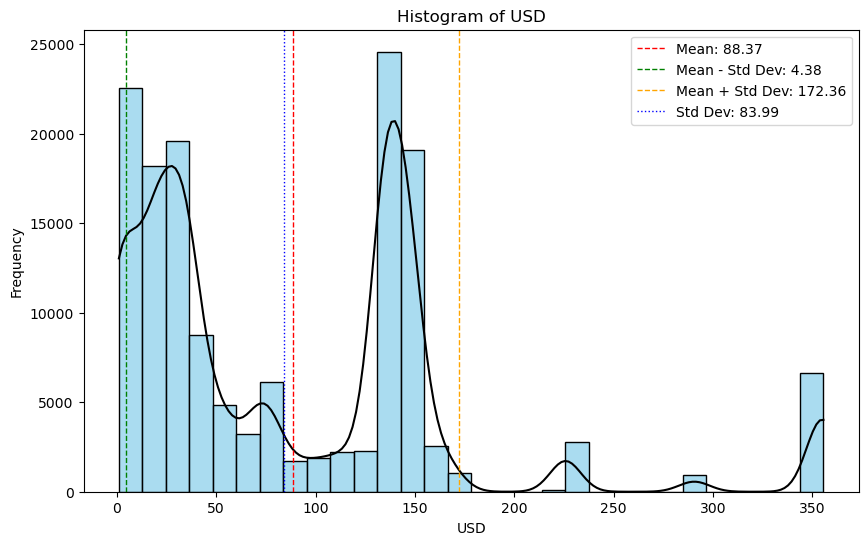

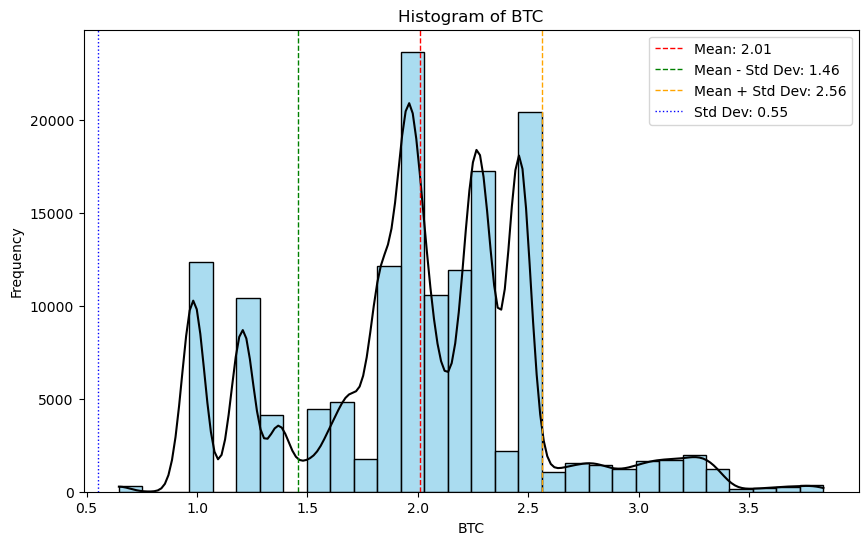

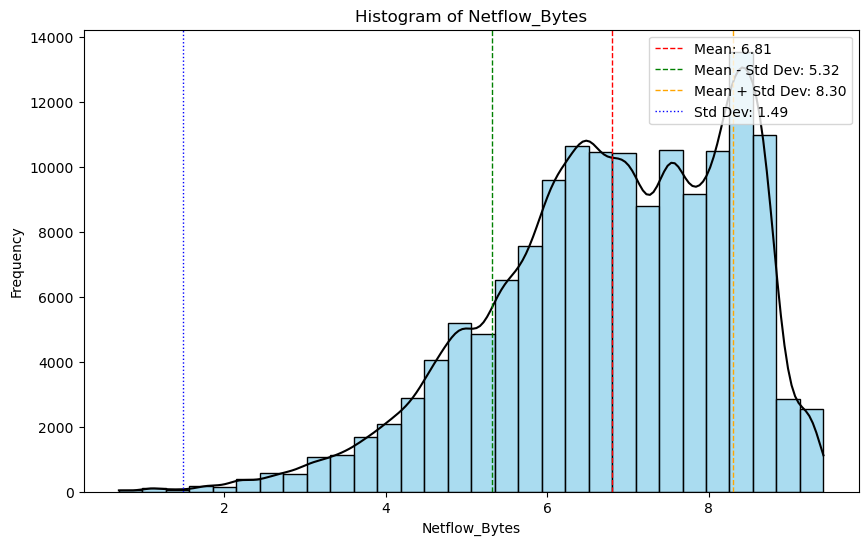

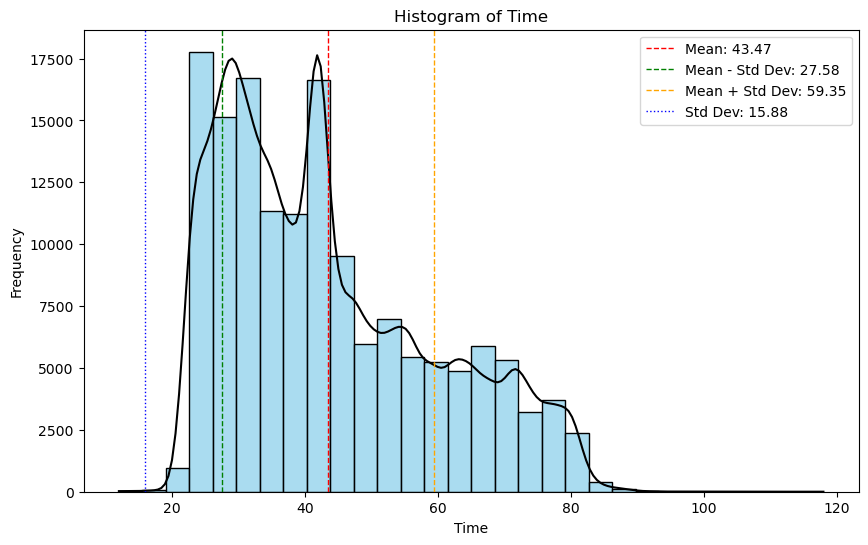

In [71]:
# --- Numeric visualizations (count, mean, and standard deviation) --- #

# Function to plot histogram with mean and standard deviation
def plot_histogram(feature):
    data = df[feature]
    mean = np.mean(data)
    std_dev = np.std(data)

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
    ax.lines[0].set_color('black')

    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
    plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
    plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

    plt.legend(loc='upper right')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Features from your dataset
numeric_features = ['USD', 'BTC', 'Netflow_Bytes','Time']

# Iterate over each numeric feature and plot
for feature in numeric_features:
    plot_histogram(feature)


In [87]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
# Encode 'Protocol' column
df['Protocol'] = lab_encoder.fit_transform(df['Protocol'])

# Encode 'Flag' column
df['Flag'] = lab_encoder.fit_transform(df['Flag'])

# Encode 'Family' column
df['Family'] = lab_encoder.fit_transform(df['Family'])

# Encode 'SeedAddress' column
df['SeedAddress'] = lab_encoder.fit_transform(df['SeedAddress'])

# Encode 'ExpAddress' column
df['ExpAddress'] = lab_encoder.fit_transform(df['ExpAddress'])

# Encode 'IPaddress' column
df['IPaddress'] = lab_encoder.fit_transform(df['IPaddress'])

# Encode 'Threats' column
df['Threats'] = lab_encoder.fit_transform(df['Threats'])

# Encode 'Port ' column
df['Port'] = lab_encoder.fit_transform(df['Port'])

# Encode 'Prediction' column
df['Prediction'] = lab_encoder.fit_transform(df[ 'Prediction' ])

df


,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,62,1,0,16,1,2,2,0.645906,22.449944,2.197225,0,1,0,2
1,52,1,0,16,1,2,2,0.645906,22.538855,2.079442,0,1,0,2
2,42,1,0,16,1,2,2,0.645906,22.627417,2.772589,0,1,0,2
3,79,1,0,16,1,2,2,0.645906,22.715633,2.302585,0,1,0,2
4,63,1,0,16,1,2,2,0.645906,22.803509,2.890372,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206821,55,2,2,15,3,1,6,3.685876,39.874804,8.114025,0,6,1,0
206822,55,2,2,15,3,1,6,3.686824,39.949969,8.117312,0,6,1,0
206823,55,2,2,15,3,1,6,3.687768,40.024992,8.120589,0,6,1,0
206824,55,2,2,15,3,1,6,3.688707,40.099875,8.123854,0,6,1,0


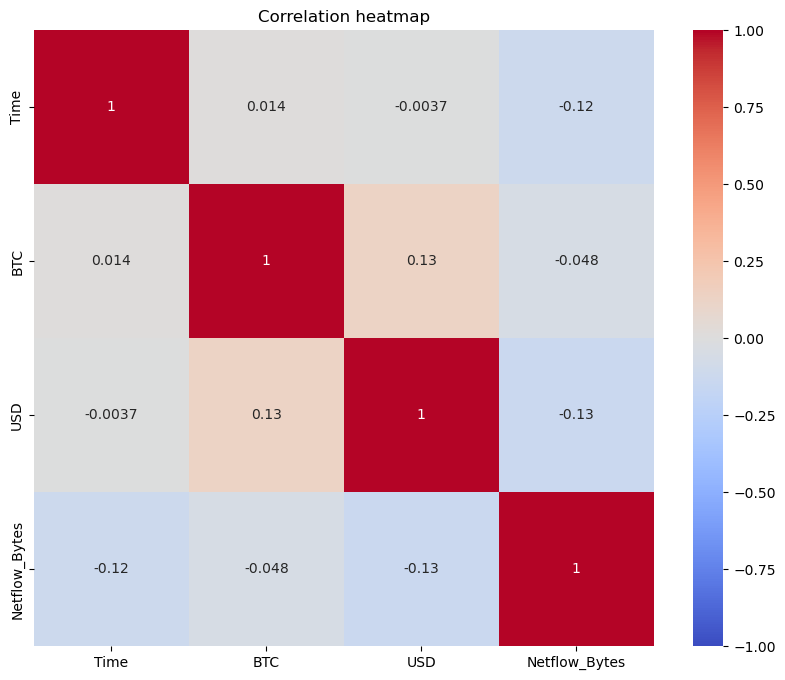

In [89]:
# Phase 4: Applied Statistical Analysis

# --- Summary Statistics --- #

df[['Time', 'BTC', 'USD', 'Netflow_Bytes']].describe()
df.head()
df.tail()
df.median()

# --- Correlations --- #

# Correlation matrix

c_matrix = df[['Time', 'BTC', 'USD', 'Netflow_Bytes']].corr()

plt.figure(figsize=(10,8)) 
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

In [91]:
# Count, Mean, and Standard Deviation Summary of numerical features
numerical_features = ['Time', 'BTC', 'USD', 'Netflow_Bytes']

df[numerical_features].describe()

,Time,BTC,USD,Netflow_Bytes
count,149042.000000,149042.000000,149042.000000,149042.000000
mean,43.466788,2.008308,88.368436,6.808107
std,15.883480,0.552361,83.991692,1.490532
min,12.000000,0.645906,1.000000,0.693147
25%,30.000000,1.766979,22.627417,5.869297
50%,41.000000,2.035473,65.734314,6.939254
75%,54.000000,2.309367,135.845500,8.067463
max,118.000000,3.836769,355.498242,9.422302


In [93]:
df.describe()

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
count,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000,149042.000000
mean,43.466788,1.039318,3.595383,9.349049,2.349304,1.961635,3.654708,2.008308,88.368436,6.808107,1.165866,4.375156,1.388166,0.983495
std,15.883480,0.735830,2.519617,4.843146,2.828766,1.492418,1.770259,0.552361,83.991692,1.490532,0.912157,2.670554,1.034163,0.744549
min,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.645906,1.000000,0.693147,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,6.000000,1.000000,0.000000,2.000000,1.766979,22.627417,5.869297,0.000000,2.000000,1.000000,0.000000
50%,41.000000,1.000000,4.000000,10.000000,1.000000,2.000000,4.000000,2.035473,65.734314,6.939254,1.000000,5.000000,1.000000,1.000000
75%,54.000000,2.000000,5.000000,14.000000,2.000000,3.000000,5.000000,2.309367,135.845500,8.067463,2.000000,7.000000,2.000000,2.000000
max,118.000000,2.000000,8.000000,16.000000,12.000000,5.000000,6.000000,3.836769,355.498242,9.422302,3.000000,8.000000,3.000000,2.000000


In [95]:
#Generate a correlation table for the dataset variables relationships. (1 mark)
df.corr()

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
Time,1.000000,0.035747,-0.064884,0.011134,0.049128,-0.029882,-0.008916,0.013890,-0.003740,-0.122736,-0.058588,-0.018640,0.050827,-0.043451
Protocol,0.035747,1.000000,-0.030652,-0.031305,0.047211,-0.011762,0.000275,-0.156845,0.085587,-0.100044,-0.252771,-0.060399,-0.182741,0.065921
Flag,-0.064884,-0.030652,1.000000,-0.059244,-0.064723,0.237445,0.216244,-0.115503,-0.173132,0.287037,-0.015433,-0.260219,0.094347,0.157808
Family,0.011134,-0.031305,-0.059244,1.000000,-0.037357,-0.102435,0.085271,0.041289,0.057668,-0.044364,0.048884,0.015559,0.000507,-0.013498
Clusters,0.049128,0.047211,-0.064723,-0.037357,1.000000,-0.091230,-0.151527,0.217440,-0.210386,-0.137626,-0.082241,0.141817,0.109406,-0.301184
SeedAddress,-0.029882,-0.011762,0.237445,-0.102435,-0.091230,1.000000,0.061348,-0.200746,0.007337,0.269550,0.035523,-0.211637,-0.034550,-0.051345
ExpAddress,-0.008916,0.000275,0.216244,0.085271,-0.151527,0.061348,1.000000,0.237591,0.329424,0.217764,0.078865,-0.164418,-0.138633,0.022050
BTC,0.013890,-0.156845,-0.115503,0.041289,0.217440,-0.200746,0.237591,1.000000,0.127276,-0.048049,0.039230,0.078009,-0.174841,-0.077292
USD,-0.003740,0.085587,-0.173132,0.057668,-0.210386,0.007337,0.329424,0.127276,1.000000,-0.132956,0.149667,-0.027653,-0.037063,0.033520
Netflow_Bytes,-0.122736,-0.100044,0.287037,-0.044364,-0.137626,0.269550,0.217764,-0.048049,-0.132956,1.000000,0.293269,-0.154047,-0.020764,0.079549


In [97]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function

# Select features (X) and target variable (y)
X = df[['USD', 'BTC', 'Netflow_Bytes','Time']]  # Features
y = df['Prediction']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Displaying the split data
print("X_train sample:")
print(X_train.head())  # Show the first 5 rows of the training feature set

print("\nX_test sample:")
print(X_test.head())  # Show the first 5 rows of the testing feature set

print("\ny_train sample:")
print(y_train.head())  # Show the first 5 rows of the training target set

print("\ny_test sample:")
print(y_test.head())  # Show the first 5 rows of the testing target set


X_train sample:
               USD       BTC  Netflow_Bytes  Time
49285   135.845500  1.944562       7.132498    28
162340   19.773720  2.235070       5.493061    26
41682   146.099281  1.944562       6.423247    28
76136   134.461891  2.235070       7.884953    32
196326  113.877127  2.035473       6.267201    77

X_test sample:
               USD       BTC  Netflow_Bytes  Time
44900   134.621692  2.309367       8.501470    40
47528    16.000000  2.461054       7.469084    36
71842   354.946475  2.461054       6.955593    24
179713   20.420578  2.973730       6.398595    53
102014   35.832946  1.205816       6.788972    26

y_train sample:
49285     1
162340    0
41682     1
76136     1
196326    1
Name: Prediction, dtype: int64

y_test sample:
44900     1
47528     2
71842     1
179713    2
102014    2
Name: Prediction, dtype: int64


In [101]:
pip install sklearn-genetic 


     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.1 MB 1.2 MB/s eta 0:00:01
     ---- ----------------------------------- 0.1/1.1 MB 1.2 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.1 MB 1.1 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.1 MB 1.1 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.1 MB 1.1 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.1 MB 1.1 MB/s eta 0:00:01
     ------------- -------------------------- 0.3/1.1 MB 866.5 kB/s eta 0:00:01
     ------------- -------------------------- 0.3/1.1 MB 866.5 kB/s eta 0:00:01
     ------------- -------------------------- 0.3/1.1 MB 866.5 kB/s eta 0:00:01
     ---------------- ----------------------- 0.4/1.1 MB 815.2 kB/s eta 0:00:0

In [103]:
#The %%time command is typically used in Jupyter Notebook environments, such as Jupyter Notebook or JupyterLab. 
#It is called a "magic command" and is used to measure the execution time of a specific code cell. 
#When you include %%time at the beginning of a cell, it tells Jupyter to measure the time it takes to run the code within 
#that cell
#%%time


# Import various libraries and tools for building and evaluating machine learning models in Python
# Imported models: ensemble, random forest, SVM, Naive Bayes, genetic algorithm
# Imported evaluation metrics: accuracy, precision, recall, f1 score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

from genetic_selection import GeneticSelectionCV  #function to import gA -> cross validation 
from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [105]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) #  It specifies the number of trees in the Random Forest. 
#In this case, there are 100 trees in the forest

# random_state: This parameter is used to set the random seed for reproducibility. 
#By setting it to 42, the randomization process will be the same each time the code is run,
#ensuring consistent results for the Random Forest model.

In [107]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
rf_pred=rf.predict(X_test)

#This code snippet uses the trained Random Forest classifier (rf) to make predictions on the test data (X_test). 
#The predict method takes the test features in X_test as input and produces predicted labels for these features. 
#The predictions are stored in the rf_pred variable, which can be used for further evaluation or analysis to assess how well 
#the model performs on unseen data.

In [111]:

# Calculate the accuracy, classification report, and confusion matrix
rf_accuracy = accuracy_score(rf_pred, y_test) # Compare predicted labels (rf_pred) to actual test labels (y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)# Generate confusion matrix
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)

Accuracy of Random Forest :  0.979
Classification report of Random Forest : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8237
           1       0.98      0.98      0.98     13241
           2       1.00      0.97      0.98      8331

    accuracy                           0.98     29809
   macro avg       0.98      0.98      0.98     29809
weighted avg       0.98      0.98      0.98     29809

Confusion Matrix of Random Forest : 
 [[ 8103   120    14]
 [  216 13012    13]
 [  109   145  8077]]


In [116]:
# Initialize the Linear Support Vector Classifier (SVC)
svr = LinearSVC()

# Train the Linear SVC model on the training dataset
svr.fit(X_train, y_train)

# Make predictions on the test set
svr_pred = svr.predict(X_test)

# Calculate evaluation metrics for SVM
svr_accuracy = accuracy_score(y_test, svr_pred)  # Compare actual vs predicted labels
svr_report = classification_report(y_test, svr_pred) 
svr_matrix = confusion_matrix(y_test, svr_pred)  # Confusion matrix

# Print the evaluation results
print('Accuracy of SVM: ', round(svr_accuracy, 3))
print('Classification Report of SVM:\n', svr_report)
print('Confusion Matrix of SVM:\n', svr_matrix)


Accuracy of SVM:  0.247
Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.26      0.87      0.40      8428
           1       0.00      0.00      0.00     13277
           2       0.02      0.00      0.01      8104

    accuracy                           0.25     29809
   macro avg       0.09      0.29      0.13     29809
weighted avg       0.08      0.25      0.11     29809

Confusion Matrix of SVM:
 [[ 7343     0  1085]
 [12987     0   290]
 [ 8078     0    26]]


In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Naive Bayes model
nb = GaussianNB()

# Train the Naive Bayes model
nb.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb.predict(X_test)

# Calculate evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)  # Compare actual vs predicted labels
nb_report = classification_report(y_test, nb_pred)  # Classification report with target names
nb_matrix = confusion_matrix(y_test, nb_pred)  # Confusion matrix

# Print the evaluation results
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)


Accuracy of Naive Bayes :  0.665
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.49      0.48      0.48      8428
           1       0.80      0.87      0.84     13277
           2       0.58      0.52      0.55      8104

    accuracy                           0.67     29809
   macro avg       0.63      0.62      0.62     29809
weighted avg       0.66      0.67      0.66     29809

Confusion Matrix of Naive Bayes :
 [[ 4015  1559  2854]
 [ 1520 11561   196]
 [ 2609  1246  4249]]


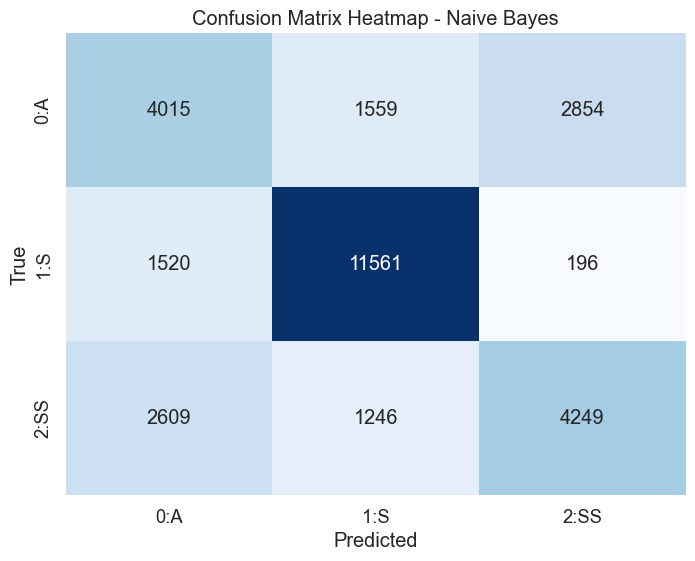

In [120]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap - Naive Bayes")
plt.show()

Accuracy of Naive Bayes:  0.665
Classification report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48      8428
           1       0.80      0.87      0.84     13277
           2       0.58      0.52      0.55      8104

    accuracy                           0.67     29809
   macro avg       0.63      0.62      0.62     29809
weighted avg       0.66      0.67      0.66     29809

Confusion Matrix of Naive Bayes:
 [[ 4015  1559  2854]
 [ 1520 11561   196]
 [ 2609  1246  4249]]


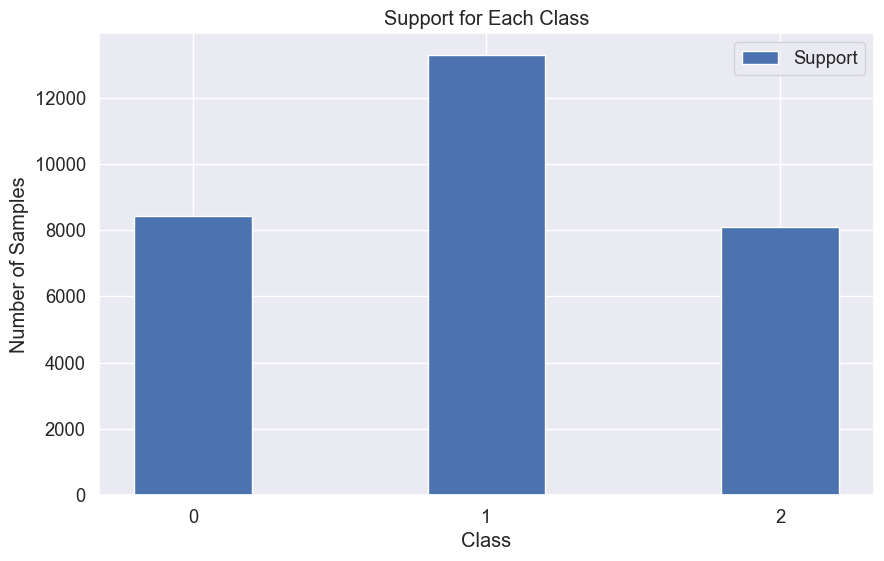

In [122]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have nb_pred and y_test defined

# Calculate accuracy, classification report (as dictionary), and confusion matrix
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred, target_names=["0", "1", "2"], output_dict=True)  # Get metrics as a dictionary
nb_matrix = confusion_matrix(y_test, nb_pred)

# Define the class labels explicitly
labels = ["0", "1", "2"]

# Extract support for all classes from the classification report
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

# Print accuracy, classification report, and confusion matrix
print('Accuracy of Naive Bayes: ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes:\n', classification_report(y_test, nb_pred, target_names=labels))
print('Confusion Matrix of Naive Bayes:\n', nb_matrix)

# Plot support for each class
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.4, label='Support', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(labels)
plt.legend()
plt.title('Support for Each Class')
plt.show()

Accuracy of Naive Bayes:  0.665
Classification report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48      8428
           1       0.80      0.87      0.84     13277
           2       0.58      0.52      0.55      8104

    accuracy                           0.67     29809
   macro avg       0.63      0.62      0.62     29809
weighted avg       0.66      0.67      0.66     29809



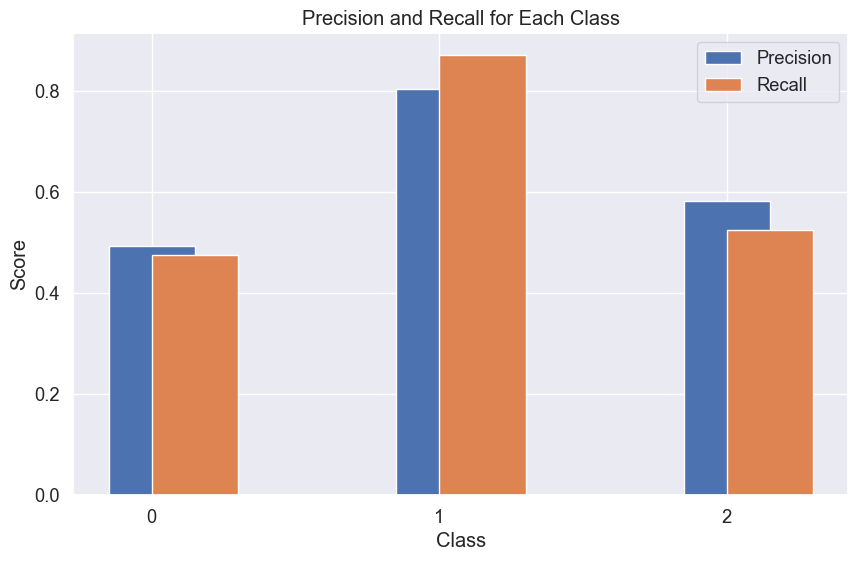

In [124]:
# Assuming you already have nb_pred and y_test defined

# Calculate accuracy, classification report (as dictionary), and confusion matrix
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred, target_names=["0", "1", "2"], output_dict=True)  # Get metrics as a dictionary
nb_matrix = confusion_matrix(y_test, nb_pred)

# Define the class labels explicitly
labels = ["0", "1", "2"]

# Extract precision and recall for all classes from the classification report
precision = [nb_report[label]['precision'] if label in nb_report else 0.0 for label in labels]
recall = [nb_report[label]['recall'] if label in nb_report else 0.0 for label in labels]

# Print accuracy and classification report
print('Accuracy of Naive Bayes: ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes:\n', classification_report(y_test, nb_pred, target_names=labels))

# Plot precision and recall
plt.figure(figsize=(10, 6))
plt.bar(labels, precision, width=0.3, label='Precision', align='center')
plt.bar(labels, recall, width=0.3, label='Recall', align='edge')

plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(labels)
plt.legend()
plt.title('Precision and Recall for Each Class')
plt.show()


In [131]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)

#In this code snippet, the Stacking Classifier (clf) is trained on the training data (X_train and y_train) using the fit method. After training, the classifier is used to make predictions on the test data (X_test) using the predict method. Finally, the accuracy of the predictions is calculated using scikit-learn's accuracy_score function and stored in the variable accuracy.

#The code essentially performs the following steps:

#Trains the Stacking Classifier (clf) using the training data.
#Uses the trained classifier to predict the target labels for the test data.
#Calculates the accuracy of the predictions by comparing them to the true labels (y_test).
#The accuracy variable will contain the accuracy score of the Stacking Classifier's predictions on the test data. 
#This score measures how well the classifier performed in terms of correctly classifying the data points in the test set.



eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : ', eb_matrix)
print('Classification Report of Ensemble Model :', eb_report)


#In this code snippet, the accuracy, confusion matrix, and classification report for the ensemble model (clf) are evaluated 
#and printed.

#Here's what each part of the code does:

#eb_accuracy: Calculates the accuracy of the ensemble model's predictions by comparing them to the true labels (y_test) 
#using the accuracy_score function.
#eb_matrix: Computes the confusion matrix for the ensemble model's predictions using the confusion_matrix function. 
#The confusion matrix provides information about the true positives, true negatives, false positives, and false negatives.
#eb_report: Generates a classification report for the ensemble model's predictions using the classification_report function. 
#The classification report includes metrics such as precision, recall, F1-score, and support for each class.
#Finally, the code prints out the accuracy, confusion matrix, and classification report for the ensemble model. 
#These metrics provide insights into the model's performance in terms of classification accuracy and the ability to correctly 
#classify different classes.

# Assuming you already have pred and y_test defined for your Ensemble Model

eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : \n', eb_matrix)
print('Classification Report of Ensemble Model :\n', eb_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Ensemble Model")
plt.show()


MemoryError: Unable to allocate 932. KiB for an array with shape (119233,) and data type float64

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Model']

# Precision, Recall, and F1-score values from your dataset
precision = [100, 100, 93, 100]
recall = [100, 98, 91, 100]
f1_score = [100, 99, 96, 100]

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Machine Learning Models')

# Set y-axis label
ax.set_ylabel('Scores (%)')

# Set plot title
ax.set_title('Evaluation Metrics: Precision, Recall, and F1-Score for Different Models')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Define the algorithms and their corresponding accuracies
algorithms = ['Random Forest', 'SVM', 'NB', 'Ensemble Learning']
accuracies = [100, 64, 77, 99]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'red', 'green', 'purple'])
plt.ylim(0, 110)  # Set the y-axis limit for better visualization
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 2, str(v) + '%', ha='center', va='bottom', fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()
